Import required libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt

Read final dataset from Phase - 1

In [107]:
data = pd.read_csv('final_dataset.csv')

Shuffle the dataset usnig Numpy Random Permutation

In [108]:
shuffle_index = np.random.permutation(data.shape[0])
data = data.iloc[shuffle_index]

Use 70% of the dataset for training, and remaining 30% for testing.

In [109]:
train_size = int(data.shape[0]*0.7)

In [110]:
train_df = data.iloc[:train_size,:] 

test_df = data.iloc[train_size:,:]

train = train_df.values

test = test_df.values

y_true = test[:,-1]

print('Train_Shape: ',train_df.shape)
print('Test_Shape: ',test_df.shape)

Train_Shape:  (8000, 34)
Test_Shape:  (3429, 34)


Define Euclidean Distance Function 

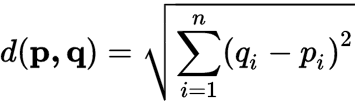

In [111]:
from math import sqrt

def euclidean_distance(x_test, x_train):
    """
    Calculates Euclidean distance between two given vectors.
    Args: Vector A, Vector B
    Returns: Distance between two given vectors.
    """
    
    distance = 0
    
    for i in range(len(x_test)-1):
        distance = distance + (x_test[i] - x_train[i])**2
    
    #print ("XTEST", x_test)
    #print ("XTRAIN", x_train)
    #print ("DIST", distance)
    return sqrt(distance)

In [112]:
def find_n_neighbors(x_test, x_train, N):
    """
    Function that finds N nearest neighbors of a vector by calculating euclidean distance between them.
    
    Args: 
        x_test : Vector A, 
        x_train : Set of vectors
        N : Number of nearest neighbors required
        
    Returns:
        N Closest vectors to vector A
        
    """
    
    distances = []
    data = []
    
    # For each datapoint in training set,
    # find the distance from X_test vector
    for row in x_train:
        distances.append(euclidean_distance(x_test, row))
  
    # Sort distances and return N records
    distances = np.array(distances)
    data = np.array(x_train)
    sort_indexes = distances.argsort()             
    data = data[sort_indexes]  
    
    return data[:N]               

In [113]:
def knn(x_test, x_train, N):
    """
        The KNN Classifier Function
        Arguments:
            x_test : Test point
            x_train : Set of N vectors
            N : no of nearest neighbours
        Returns:
            Class of test point   
    """
    
    positive = 0
    negative = 0

    # Find N nearest neighbours
    # Class of the test point will be
    # class of majority of nearing classes
    neighbors = find_n_neighbors(x_test, x_train, N)
    
    for i in neighbors:
        
        if i[-1] == 0:
            negative += 1
        else:
            positive += 1
        
    if negative > positive:
        return 0
    
    return 1

In [114]:
def calculate_accuracy(y_true, y_pred):
    """
    Function to calculate accuracy given predicted classes, and originally correct classes.
    Args:
        y_true : Actual true classes
        y_pred : Classes predicted using KNN 
        
    Returns:
        Accuracy 
    """
    correct = 0
    
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
            
    accuracy = correct / len(y_true)
    return accuracy

In [116]:
y_pred = []

for row in test:
    y_pred.append(knn(row, train, 3))

In [103]:
y_true

array([1., 1.])

In [118]:
calculate_accuracy(y_true, y_pred)

0.8226888305628464